Image shape: (168, 300, 3)
Pixel array:
 [[[23 15 26]
  [23 15 26]
  [23 15 26]
  [24 16 27]
  [24 16 27]]

 [[23 15 26]
  [23 15 26]
  [24 16 27]
  [24 16 27]
  [24 16 27]]

 [[24 16 27]
  [24 16 27]
  [24 16 27]
  [25 17 28]
  [25 17 28]]

 [[25 17 28]
  [25 17 28]
  [25 17 28]
  [26 18 29]
  [26 18 29]]

 [[26 18 29]
  [26 18 29]
  [26 18 29]
  [27 19 30]
  [27 19 30]]]


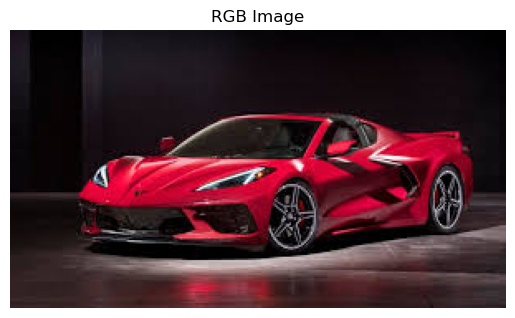

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./sample_data/sample.jpg')

if img is None:
    print("Error: Image not loaded. Check the file path.")


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image shape:", img_rgb.shape)
print("Pixel array:\n", img_rgb[0:5, 0:5])  # Small patch of 5x5 pixels

plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

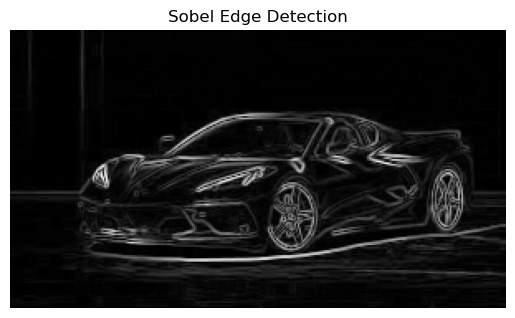

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
edges = cv2.magnitude(sobelx, sobely)

plt.imshow(edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

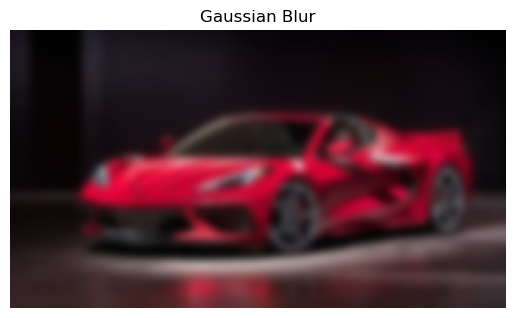

In [4]:
blur = cv2.GaussianBlur(img, (15, 15), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis("off")
plt.show()

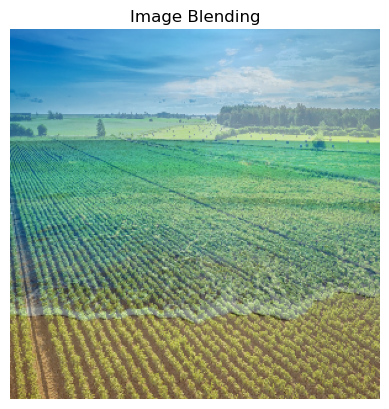

In [5]:
img1 = cv2.resize(cv2.imread('sample_data/image1.jpg'), (300, 300))
img2 = cv2.resize(cv2.imread('sample_data/image2.jpg'), (300, 300))
blend = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

# TODO: show un-blended images for colearer comparason.
plt.imshow(cv2.cvtColor(blend, cv2.COLOR_BGR2RGB))
plt.title("Image Blending")
plt.axis("off")
plt.show()

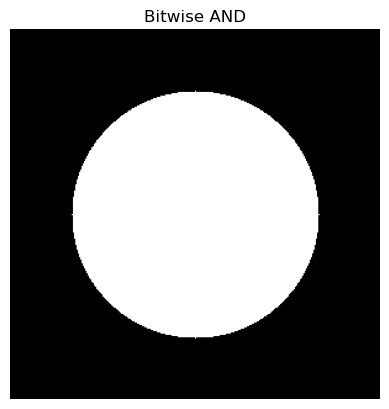

In [6]:
# Create two shapes
img1 = np.zeros((300, 300), dtype="uint8")
img2 = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(img1, (50, 50), (250, 250), 255, -1)
cv2.circle(img2, (150, 150), 100, 255, -1)

bitwise_and = cv2.bitwise_and(img1, img2)

plt.imshow(bitwise_and, cmap='gray')
plt.title("Bitwise AND")
plt.axis("off")
plt.show()

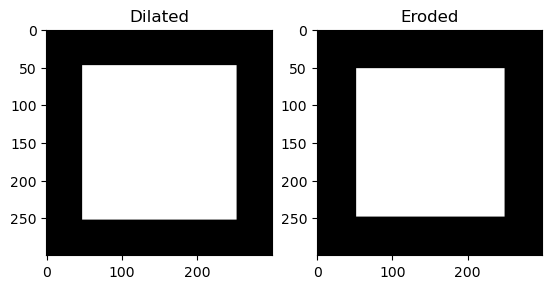

In [7]:
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(img1, kernel, iterations=1)
eroded = cv2.erode(img1, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated")
plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Eroded")
plt.show()

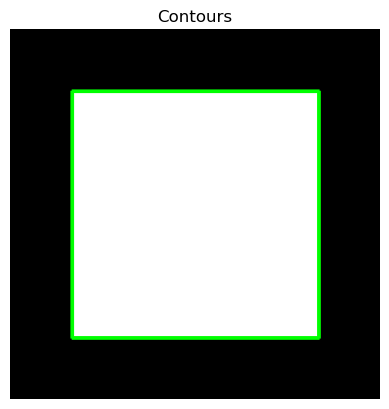

In [8]:
contours, _ = cv2.findContours(img1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contour = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)

plt.imshow(img_contour)
plt.title("Contours")
plt.axis("off")
plt.show()

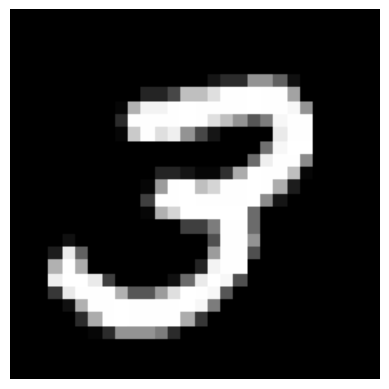

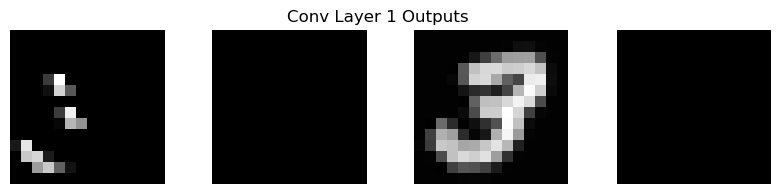

In [54]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, padding=1)
        self.conv2 = nn.Conv2d(4, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x1 = self.pool(torch.relu(self.conv1(x)))
        x2 = self.pool(torch.relu(self.conv2(x1)))
        return x1, x2

img = Image.open('sample_data/mnist_sample.png').convert('L')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)

model = SmallCNN()
features1, features2 = model(img_tensor)

# Visualize patches from conv layers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(features1[0, i].detach().numpy(), cmap='gray')
    plt.axis('off')
plt.suptitle("Conv Layer 1 Outputs")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

class MNISTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(5*5*32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.max_pool2d(torch.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = MNISTCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (1 epoch for simplicity)
for images, labels in trainloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    break  # Remove this break to train fully

print("Trained 1 batch for demo")